#### Notes



#### Yahia Ehab Mohamed 7037125 Tut_[01]

# Data Integration

### Data Load

In [1]:
import numpy as np
import pandas as pd

df_appearances = pd.read_csv("./datasets/appearances.csv")
df_clubs = pd.read_csv("./datasets/clubs.csv")
df_club_games = pd.read_csv("./datasets/club_games.csv")
df_competitions = pd.read_csv("./datasets/competitions.csv")
df_game_events = pd.read_csv("./datasets/game_events.csv")
df_game_lineups = pd.read_csv("./datasets/game_lineups.csv")
df_games = pd.read_csv("./datasets/games.csv")
df_player_valuations = pd.read_csv("./datasets/player_valuations.csv")
df_players = pd.read_csv("./datasets/players.csv")

C:\Users\Yahia\AppData\Local\Temp\ipykernel_6388\4119219150.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_game_lineups = pd.read_csv("./datasets/game_lineups.csv")
C:\Users\Yahia\AppData\Local\Temp\ipykernel_6388\4119219150.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv("./datasets/games.csv")


### Data Exploration

In [2]:
df_appearances.head(1)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90


In [3]:
df_clubs.head(1)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.5,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...


In [4]:
df_club_games.head(1)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1.0,NaN,Lutz Göttling,60,2.0,NaN,Christian Streich,Home,0


In [5]:
df_competitions.head(1)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...


In [6]:
df_game_events.head(1)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN


In [7]:
# Unneeded
df_game_lineups.head(1)

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,113289469cede9376049b78521f7b382,3606208,338,starting_lineup,25,659089,Ilya Zabarnyi,0,Centre-Back


In [8]:
df_games.head(1)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2.0,1.0,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league


In [9]:
df_player_valuations.head(1)

,player_id,date,datetime,dateweek,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,2000-01-20 00:00:00,2000-01-17,150000,3057,BE1


In [10]:
df_players.head(1)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0


### Data Merge

In [11]:
#merge clubs and club_games
df_clubs_games = pd.merge(df_clubs, df_club_games, on='club_id')

#merge games and competitions
df_games_competitions = pd.merge(df_games, df_competitions, on='competition_id')

df_games_competitions.head(1)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,competition_type,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url_y
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2.0,1.0,2.0,...,domestic_league,premier-liga,premier-liga,first_tier,domestic_league,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/premier-liga/s...


In [12]:
df_players_valuations = pd.merge(
    df_players, df_player_valuations, on="player_id", how="left"
)

df_players_valuations_appearances = pd.merge(
    df_players_valuations, df_appearances, on="player_id", how="left"
)

df_players_valuations_appearances.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,player_club_id,player_current_club_id,date_y,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,398.0,398.0,2012-08-23,Miroslav Klose,ELQ,1.0,0.0,1.0,0.0,83.0
1,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,398.0,398.0,2012-08-26,Miroslav Klose,IT1,1.0,0.0,0.0,0.0,90.0
2,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,398.0,398.0,2012-09-02,Miroslav Klose,IT1,1.0,0.0,2.0,0.0,89.0
3,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,398.0,398.0,2012-09-16,Miroslav Klose,IT1,0.0,0.0,1.0,0.0,90.0
4,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,398.0,398.0,2012-09-20,Miroslav Klose,EL,0.0,0.0,0.0,0.0,90.0


### Columns to use

#### df_games_competitions

In [13]:
# List of columns to use
used_cols = ["date", "attendance", "country_name"]

df_games_competitions = df_games_competitions[used_cols]
df_games_competitions.head(1)

,date,attendance,country_name
0,2012-08-25,21700.0,Russia


#### df_players_valuations_appearances

In [14]:
# List of columns to use
used_cols = ["assists", "goals", "highest_market_value_in_eur", "position"]

df_players_valuations_appearances = df_players_valuations_appearances[used_cols]
df_players_valuations_appearances.head(1)

,assists,goals,highest_market_value_in_eur,position
0,0.0,1.0,30000000.0,Attack


#### Column Reduction

In [15]:
df_games_competitions["date"] = pd.to_datetime(df_games_competitions["date"])
df_games_competitions["season"] = df_games_competitions["date"].dt.month.apply(
    lambda x: "Winter"
    if x in [12, 1, 2]
    else "Spring"
    if x in [3, 4, 5]
    else "Summer"
    if x in [6, 7, 8]
    else "Fall"
)
df_games_competitions = df_games_competitions.drop(columns=["date"])

# only include 5 countries with the highest attendance not related to mean
countries = (
    df_games_competitions.groupby("country_name")
    .sum()
    .sort_values(by="attendance", ascending=False)
    .head(5)
)
countries = countries.index.tolist()
df_games_competitions = df_games_competitions[
    df_games_competitions["country_name"].isin(countries)
]

# group by country and season
df_games_competitions = df_games_competitions.groupby(["country_name", "season"]).mean()

df_games_competitions

attendance
country_name season              
England      Fall    25937.389049
             Spring  38316.510471
             Summer  31304.457983
             Winter  28398.778224
France       Fall    21099.248583
             Spring  23234.479386
             Summer  21883.823256
             Winter  20692.674043
Germany      Fall    37126.870943
             Spring  43491.891975
             Summer  23133.687395
             Winter  38008.859959
Italy        Fall    23053.644805
             Spring  25520.344917
             Summer  10636.500739
             Winter  22051.656000
Spain        Fall    23461.048096
             Spring  28231.286314
             Summer  26045.996516
             Winter  23135.677476

In [16]:
df_players_valuations_appearances["goals_contribution"] = (
    df_players_valuations_appearances["goals"]
    + df_players_valuations_appearances["assists"]
)

df_players_valuations_appearances = df_players_valuations_appearances.drop(
    columns=["goals", "assists"]
)


# Define the bin edges and labels
bin_edges = list(range(0, 210_000_000, 10_000_000))
bin_labels = [f"{i}-{i + 10}" for i in range(0, 200, 10)]

# Add a new column with the bin labels based on conditions
df_players_valuations_appearances["market_value_bin_in_millions"] = pd.cut(
    df_players_valuations_appearances["highest_market_value_in_eur"],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False,  # Exclude the right endpoint
)

df_players_valuations_appearances = df_players_valuations_appearances.drop(
    columns=["highest_market_value_in_eur"]
)

df_players_valuations_appearances

,position,goals_contribution,market_value_bin_in_millions
0,Attack,1.0,30-40
1,Attack,0.0,30-40
2,Attack,2.0,30-40
3,Attack,1.0,30-40
4,Attack,0.0,30-40
...,...,...,...
37595863,Attack,0.0,0-10
37595864,Defender,0.0,0-10
37595865,Defender,0.0,0-10
37595866,Defender,0.0,0-10


#### Remove Outliers

In [17]:
#attendance cant be negative and cannot be more than 132000
df_games_competitions = df_games_competitions[
    (df_games_competitions["attendance"] >= 0)
    & (df_games_competitions["attendance"] <= 132000)
]

df_games_competitions.head()

attendance
country_name season              
England      Fall    25937.389049
             Spring  38316.510471
             Summer  31304.457983
             Winter  28398.778224
France       Fall    21099.248583

In [18]:
df_players_valuations_appearances = df_players_valuations_appearances[
    (df_players_valuations_appearances["goals_contribution"] >= 0)
    & (df_players_valuations_appearances["goals_contribution"] <= 10)
]

df_players_valuations_appearances.head()

,position,goals_contribution,market_value_bin_in_millions
0,Attack,1.0,30-40
1,Attack,0.0,30-40
2,Attack,2.0,30-40
3,Attack,1.0,30-40
4,Attack,0.0,30-40


#### Remove Nulls or NAN

In [19]:
df_games_competitions = df_games_competitions.dropna()
df_players_valuations_appearances = df_players_valuations_appearances.dropna()

df_players_valuations_appearances = df_players_valuations_appearances[
    df_players_valuations_appearances["position"] != "Missing"
]
df_players_valuations_appearances = df_players_valuations_appearances[
    df_players_valuations_appearances["position"] != "Goalkeeper"
]

#### Specify Datatype

##### df_games_competitions

In [20]:
# Ensure correct column types
df_games_competitions['attendance'] = df_games_competitions['attendance'].astype(int)

##### df_players_valuations_appearances

In [21]:
df_players_valuations_appearances = df_players_valuations_appearances.astype(
    {
        "goals_contribution": int,
    }
)

## First Research

##### Do football matches in top European countries (Germany, Spain, England, France, and Italy) consistently attract more fans during specific seasons?

# Data Analysis

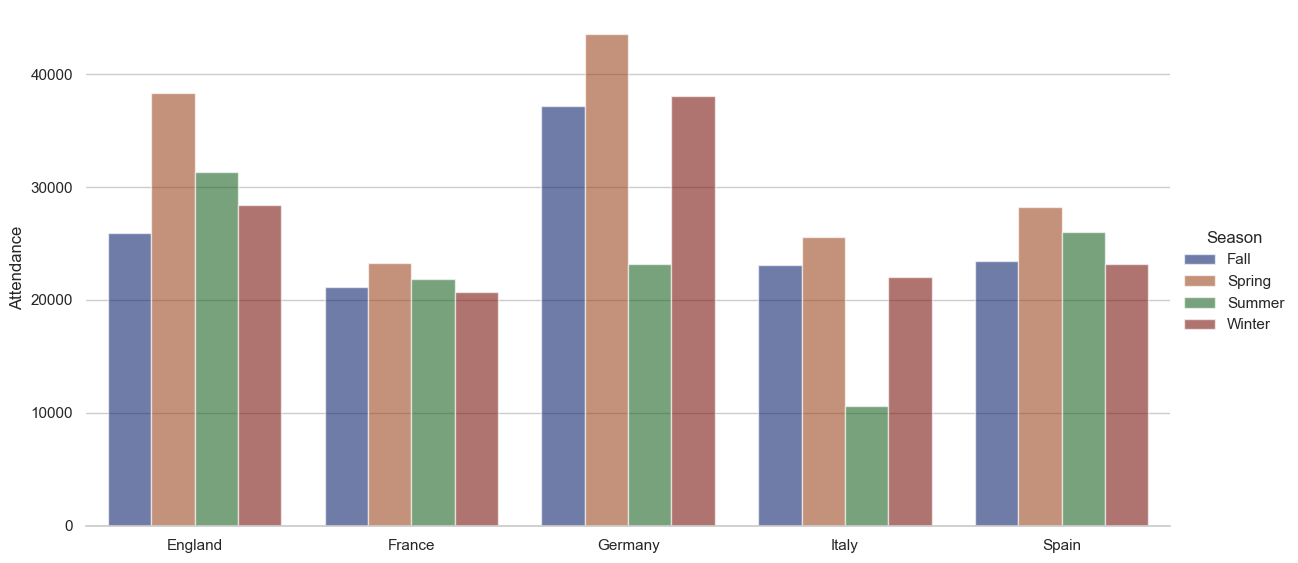

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df_games_competitions,
    kind="bar",
    x="country_name",
    y="attendance",
    hue="season",
    palette="dark",
    alpha=0.6,
    height=6,
    aspect=2,
)
g.despine(left=True)
g.set_axis_labels("", "Attendance")
g.legend.set_title("Season")

# Show the plot
plt.show()

##### Answer: Yes, football matches in these countries generally draw the most attendance in the Spring. However, there are differences in the second-highest attendance season. For Germany and Spain, it's Winter and Fall, while for England, France, and Italy, it's Summer. Understanding these patterns can help with scheduling and engaging fans. Further investigation into what influences these trends would provide more insights.

##### Reason: The research on football match attendance in top European countries aims to help clubs and leagues make smarter decisions. By figuring out when fans attend the most, they can plan exciting matches and events during those times, boosting interest. This knowledge also helps in creating effective marketing strategies, selling more tickets, and organizing special events during peak seasons to enhance the fan experience. Importantly, the research guides decisions on pricing, sponsorships, and broadcasting to revenue generation.

## Second Research

#### Is there a relationship between the market value of football players and their average goal contributions across different positions

In [27]:
#Take random sample from df_players_valuations_appearances 1% of the data
df_players_valuations_appearances_sample = df_players_valuations_appearances.sample(frac=0.1)

df_players_valuations_appearances_sample.shape

(3457651, 3)

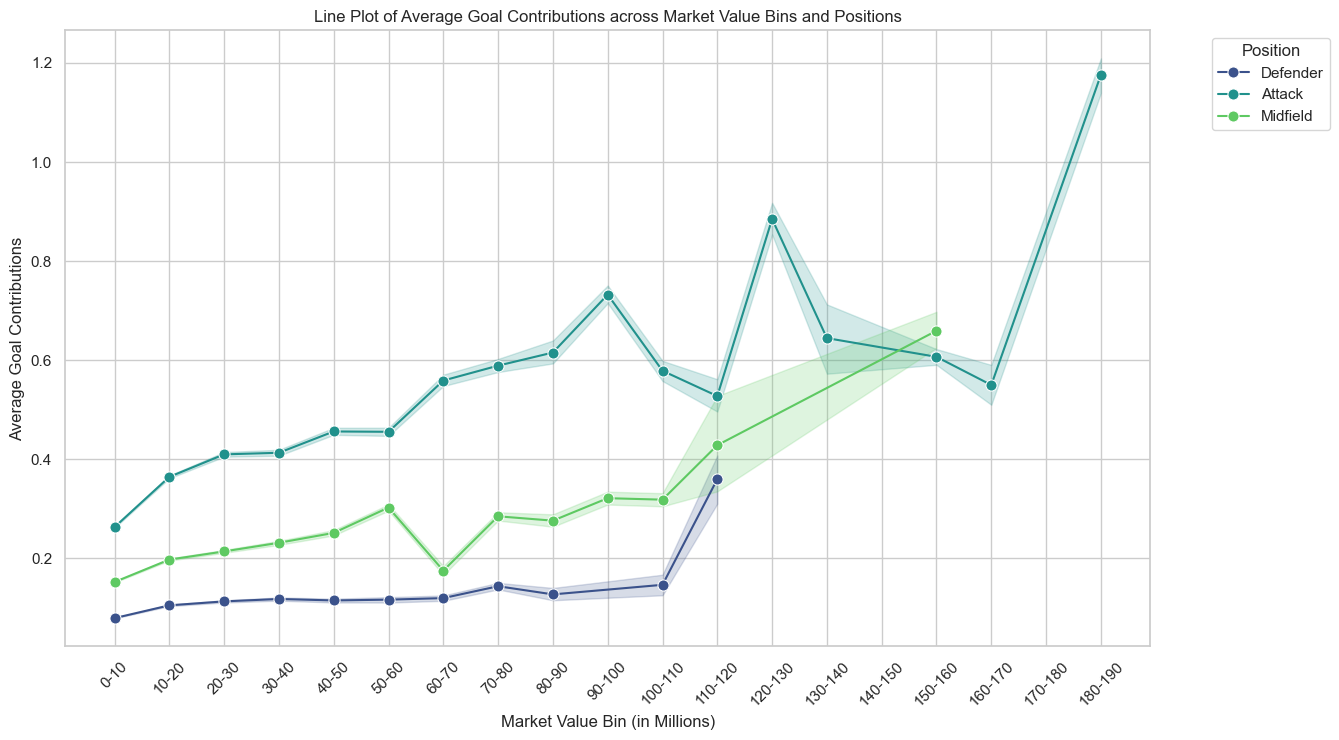

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    x="market_value_bin_in_millions",
    y="goals_contribution",
    hue="position",
    data=df_players_valuations_appearances_sample,
    palette="viridis",
    marker="o",  # Marker style
    markersize=8,  # Marker size
    linestyle="-",  # Line style
)

# Set labels and title
plt.xlabel("Market Value Bin (in Millions)")
plt.ylabel("Average Goal Contributions")
plt.title(
    "Line Plot of Average Goal Contributions across Market Value Bins and Positions"
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend outside the plot for better visibility
plt.legend(title="Position", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

##### Answer : The line plot shows a clear pattern: football players with higher average goal contributions tend to have higher market values across all positions. Specifically, attackers lead in both goal contributions and market value, followed by midfielders and defenders. This direct correlation simplifies decision-making for clubs, emphasizing that investing in players who contribute more goals also comes with a higher price tag. This straightforward relationship underscores the importance of performance metrics, particularly goal contributions, in determining player values. In practical terms, the plot guides teams to prioritize players who not only excel in scoring goals but also align with budget considerations based on their respective positions.

# Bonus

Finally After This Project. Dont forget that the stats are just numbers. Here is the GOAT:


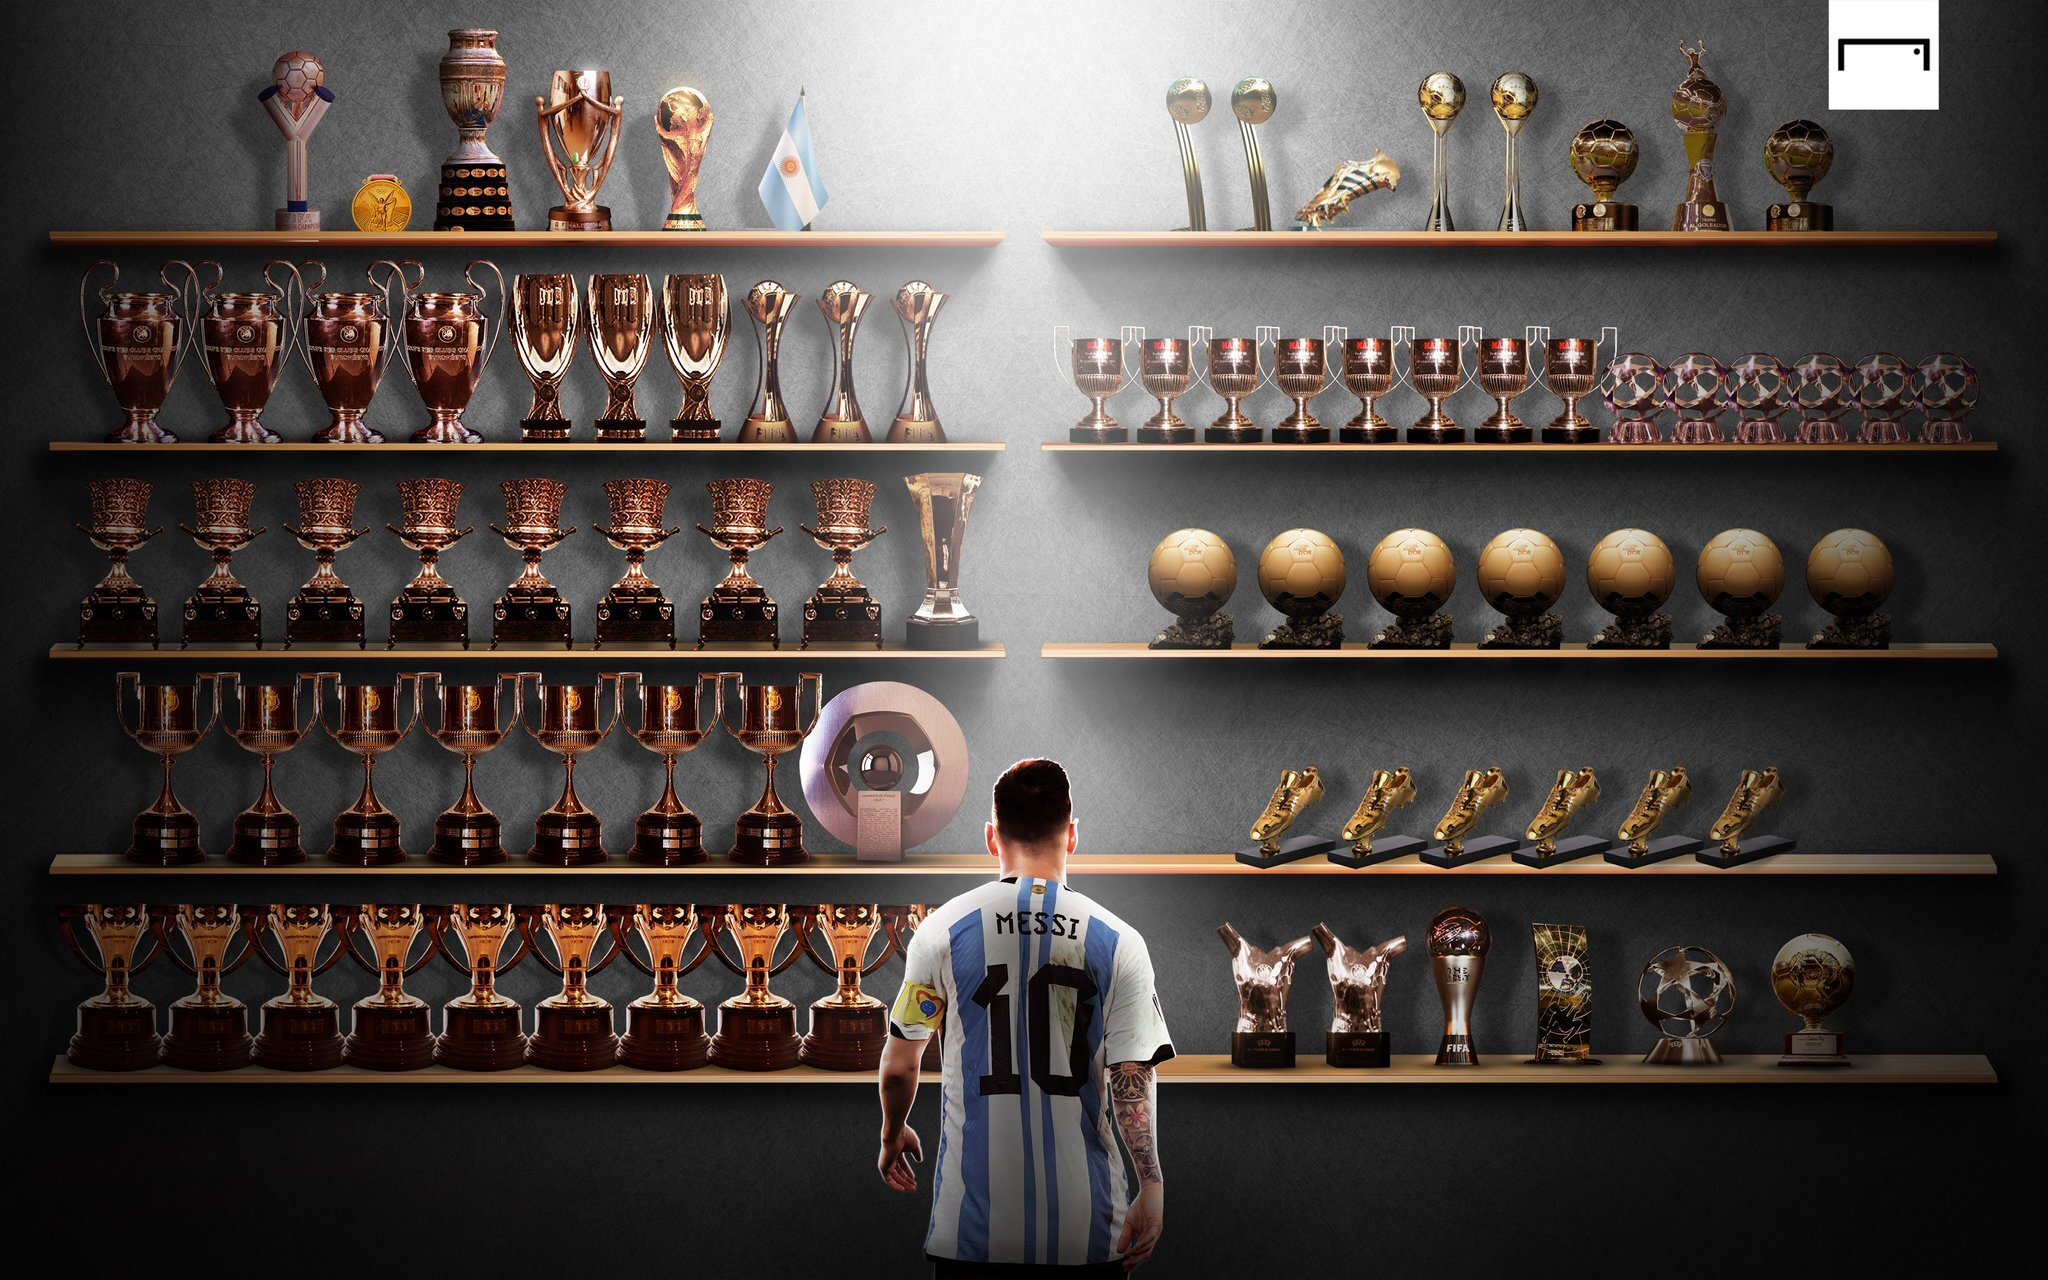

In [2]:
import time
from IPython.display import Image

print(
    "Finally After This Project. Dont forget that the stats are just numbers."
    + " Here is the GOAT:"
)


time.sleep(5)
Image(filename="GOAT.jpg")